FEUILLE DE TP 2

---
# Le modèle de Lotka-Volterra
---

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np                       # pour les numpy array
from scipy.integrate import odeint       # seulement odeint
import matplotlib.pyplot as plt          # librairie graphique

L'objectif de cette partie est d'étudier numériquement le modèle de Lotka-Volterra et d'illustrer le paradoxe observé par d'Anconna (voir la fiche de cours n°1).

On se donne donc deux populations $H(t)$ de sardines (les proies) et $P(t)$ de requins (les prédateurs) au temps $t,$ dont l'évolution au cours du temps suit la loi :

\begin{equation*}
     \begin{cases}
    H'(t) = aH(t) - b H(t)P(t), \\
    P'(t) = -cP(t) + d H(t) P(t),
     \end{cases}
\end{equation*}

où $a,b,c,d >0$. Le coefficient $a$ représente le taux de reproduction des sardines en l'abscence de requins, $c$ le taux de mortalité en l'abscence de sardines, $b$ le taux de mortalités des sardines mangés par les requins et $d$ le taux de reproduction des requins en fonction de la quantité de sardines mangées.

On suppose connues les populations de sardines et de requins à l'instant initial $t_0=0$ :

\begin{equation*}
     \begin{cases}
    H(0) = H_0, \\
    P(0) = P_0,
     \end{cases}
\end{equation*}
où $H_0\ge 0$ et $P_0\ge 0$ sont donnés.

Pour toutes les applications numériques, on choisit : $a=0.1$, $b=d=6\cdot 10^{-5},$ $c=0.05$. On choisit une population initiale de $H_0=1500$ sardines et $P_0=500$ requins.

## Etude du champ de vecteurs du système

**CHAMP DE VECTEURS D'UN SYSTÈME DE DEUX EDOs AUTONOME**

$\newcommand{\R}{{\mathbb R}}$

Soit $f, g:\R^2\longrightarrow \R$ des fonctions de classe $C^1$ et considérons le système de deux équations différentielles autonomes

\begin{equation*}
(S) \ \ \ \ 
\begin{cases}
& x'(t)=f(x(t),y(t)), \\
& y'(t)=g(x(t),y(t)).
\end{cases}
\end{equation*}

On remarque que si $ (x, y) $ est une solution du système alors le vecteur vitesse de la courbe paramétrée $M:t\mapsto (x(t), y(t))$ au point $M(t_0)$ est $M'(t_0) = (x'(t_0), y'(t_0)) = (f(x(t_0),y(t_0)), g( x(t_0), y( t_0 ) ) )$. La définition qui suit est donc naturelle.

On appelle __champ de vecteurs__ associé à $(S)$ l'application de $\R^2$ dans $\R^2$ définie par
$$
V(x,y)=\big(f(x,y),g(x,y)\Big).
$$

On représente le champ de vecteurs $V$ en un point $P=(x_0,y_0)$ du plan par une flèche correspondant au segment $[P,P+\varepsilon V(P)]$, avec $\varepsilon$ suffisament petit pour que le dessin reste lisible, partant de $P$ et pointant vers $P+\varepsilon V(P)$.

**EXERCICE 1**

> 1. En posant $X = (H,P)$, réécrire le système sous la forme $X' = F(X)$ où $F=(F_1,F_2)$ avec $F_1,F_2$ deux fonctions définies sur $\mathbb{R}^2$ à valeurs dans $\mathbb{R}$.

> 2. Représentez dans l'espace des phases $(H,P)$ le champ de vecteur associé à ce système d'équations. Vous pouvez utiliser la fonction `quiver` vue dans l'Exercice 1 du TP01.
> 3. Que pouvez-vous deviner sur l'allure des solutions ?

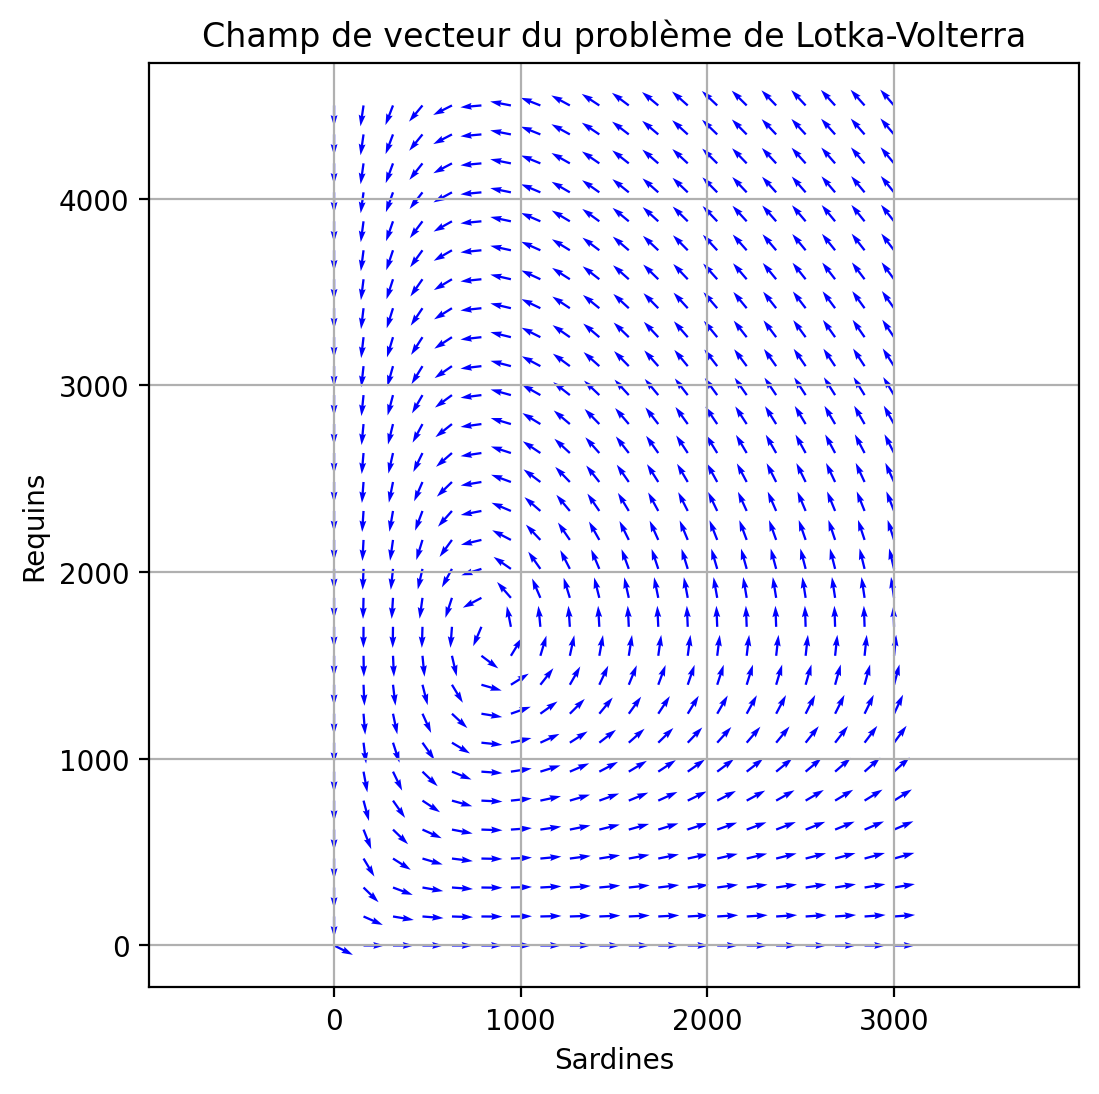

In [3]:

# parameters
a, b, c, d = 0.1, 6*pow(10,-5), 0.05, 6*pow(10,-5)

def F1(x, y):
    """fonction second membre pour les sardines"""
    return a*x-b*x*y

def F2(x, y):
    """fonction second membre pour les requins"""
    return -c*y+d*x*y

sardines, requins = np.meshgrid(
    np.linspace(0.1, 3000, 20),
    np.linspace(0.1, 4500, 30)
)
fsardines, frequins = F1(sardines, requins), F2(sardines, requins)
n_sndmb = np.sqrt(fsardines**2 + frequins**2)  

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)

# Tracer le champs des vecteurs du système (S)

ax.quiver(sardines,requins,fsardines/n_sndmb,frequins/n_sndmb, angles='xy', color='b')

ax.axis('equal')
ax.grid(True)
ax.set_title("Champ de vecteur du problème de Lotka-Volterra")
ax.set_xlabel("Sardines")
ax.set_ylabel("Requins")
plt.show()

## Résolution numérique

On s'intéresse dans cette partie à l'approximation numérique de la solution du système de Lotka-Volterra dans un intervalle de temps de la forme $[0,T]$. On pourra prendre $T=200$ ans.

On va résoudre ce problème de Cauchy grâce à la fonction `odeint` vue au TP précédent. 
On se donne un pas $\Delta t=T/N>0,$ où $N$ est un entier non nul, et on considère une subdivision uniforme de pas $\Delta t$ de l'intervalle $[0, T],$ définie par les $(N+1)$ points  
$$
t_0=0,\ t_1=\Delta t,\ \cdots,\ t_N=N\Delta t=T, 
$$
et on note note $H^n$ (resp. $P^n$) la valeur approchée de $H(t_n)$ (resp. $P(t_n)$) à l'instant $t_n$ pour $n=0,\cdots,N$.

*Pour les applications numériques, nous prendrons $\Delta t=0.2$.*

**EXERCICE 2**

> 1. Afin d'appliquer la méthode `odeint` à la résolution du problème de Cauchy qui nous intéresse, définissez la fonction second membre (attention à l'ordre des arguments) :
> $$ F(X, t) = (F_1(X), F_2(X))^t,$$
> où $X=(x,y)^t \in R^2$.
> 2. Construisez le vecteur $t = (t^0,\ldots,t^N)$ des temps discrets où la solution approchée sera calculée.
> 2. Construisez la solution approchée à l'aide de la fonction `odeint`.

In [3]:
# COMPLETER LE CODE SUIVANT

# parameters
a, b, c, d = 0.1, 6*pow(10,-5), 0.05, 6*pow(10,-5)
T, N = 200, 1000
H0, P0 = 1500, 500

def F(X, t):
    """fonction second membre pour le système"""
    x, y = X[0], X[1]
    return [F1(x,y),F2(x,y)]

t = np.linspace(0, T, N+1)
X = [H0,P0]

sol = odeint(F,X,t)

NameError: name 'odeint' is not defined


> 4. Tracez dans la même figure les solutions approchées $[H_0,H_1,\ldots,H_N]$ et $[P_0,P_1,\ldots,P_N]$ en fonction du temps.
>
> 5. Rajoutez des légendes et des titres à votre figure.

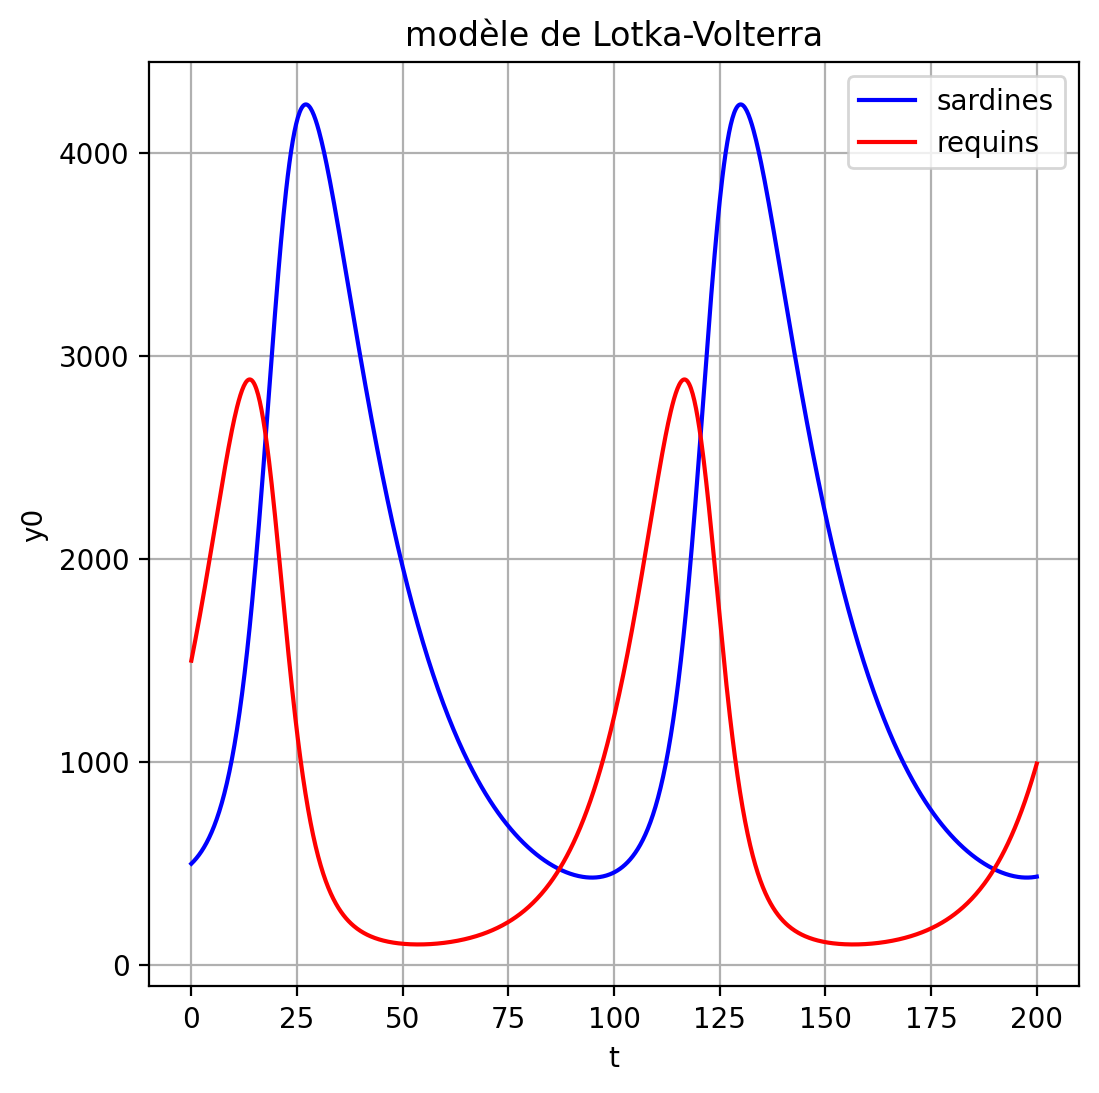

In [5]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1)

ax.plot(t,sol[0:,1], label = 'sardines', color = 'b')
ax.plot(t,sol[0:,0], label = 'requins', color = 'r')

ax.set_title(f"modèle de Lotka-Volterra")
ax.grid(True)
ax.set_xlabel(f't')
ax.set_ylabel(f'y0')
ax.legend()


**EXERCICE 3**

> 1. Créez une seconde figure et tracez sur cette figure $P$ en fonction de $H$ dans le plan $(H,P)$ (portrait de phase).
> 2. Superposez cette représentation à la figure de l'Exercice 1.

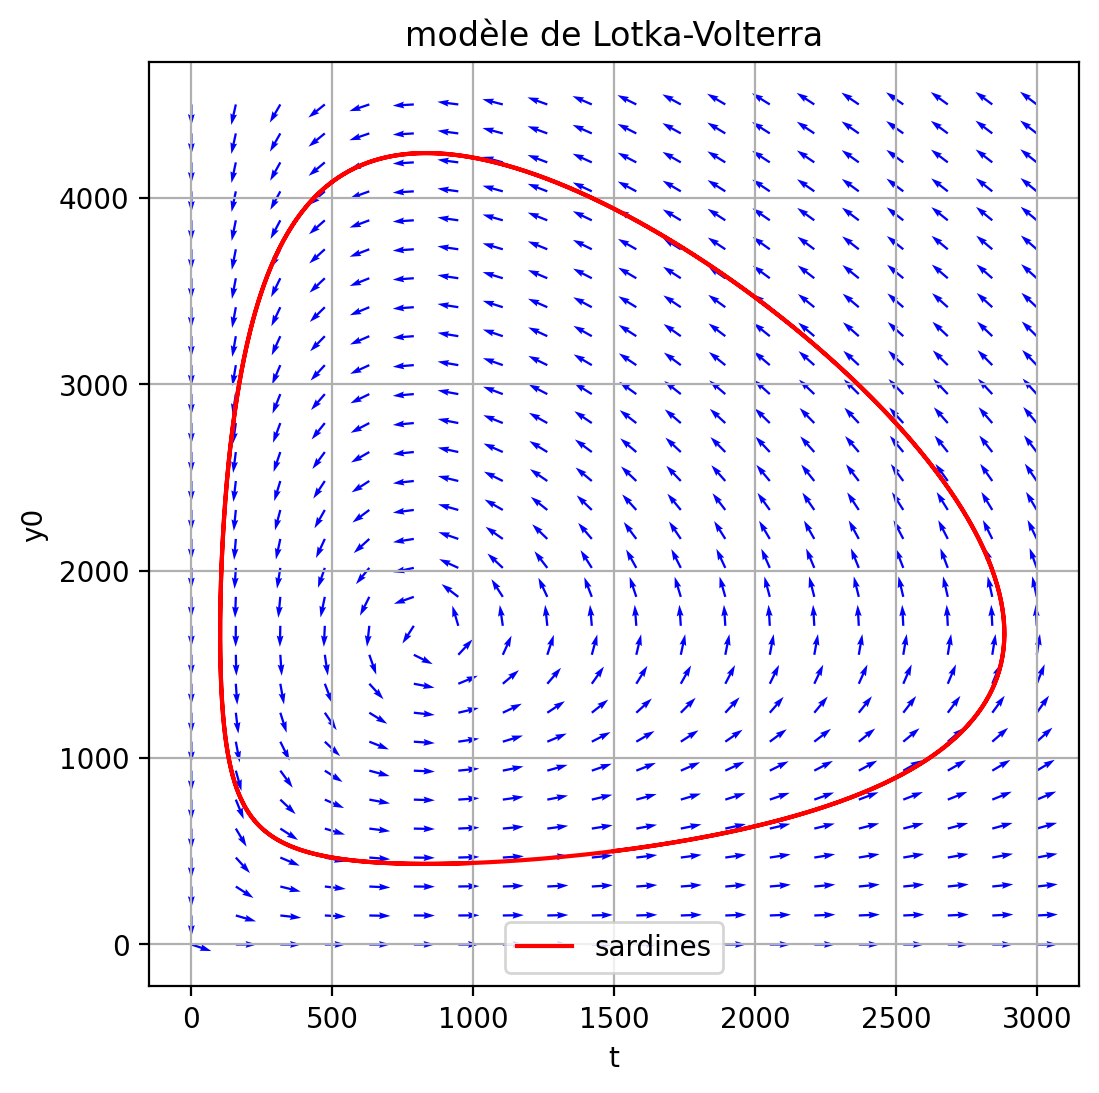

In [6]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1)

ax.plot(sol[0:,0],sol[0:,1], label = 'sardines', color = 'r')
ax.quiver(sardines,requins,fsardines/n_sndmb,frequins/n_sndmb, angles='xy', color='b')
ax.set_title(f"modèle de Lotka-Volterra")
ax.grid(True)
ax.set_xlabel(f't')
ax.set_ylabel(f'y0')
ax.legend()



> 3. Commentez ces deux graphiques : expliquez clairement ce qui selon vous justifie les variations de chacune des espèces. 

##  L'impact de la pêche

Nous pêchons maintenant une même proportion $p$ de requins et de sardines ce qui se traduit par l'ajout de deux termes négatifs $-pH(t)$ et $-pP(t)$ dans les équations. Le modèle devient
\begin{equation*}
     \begin{cases}
        H'(t)&=H(t)( a-p-bP(t)),\\
        P'(t)&=P(t)( -c -p +dH(t)).
     \end{cases}
\end{equation*}


**EXERCICE 4 (exercice noté)**

> 1. Reprenez chacune des questions des Exercices 1-3 pour ce nouveau modèle. Visualisez la solution pour les valeurs de p  de la liste $ [0, 0.02, 0.04, 0.06] $. On pourra tracer le champs de vecteurs pour $ p = 0 $ uniquement.

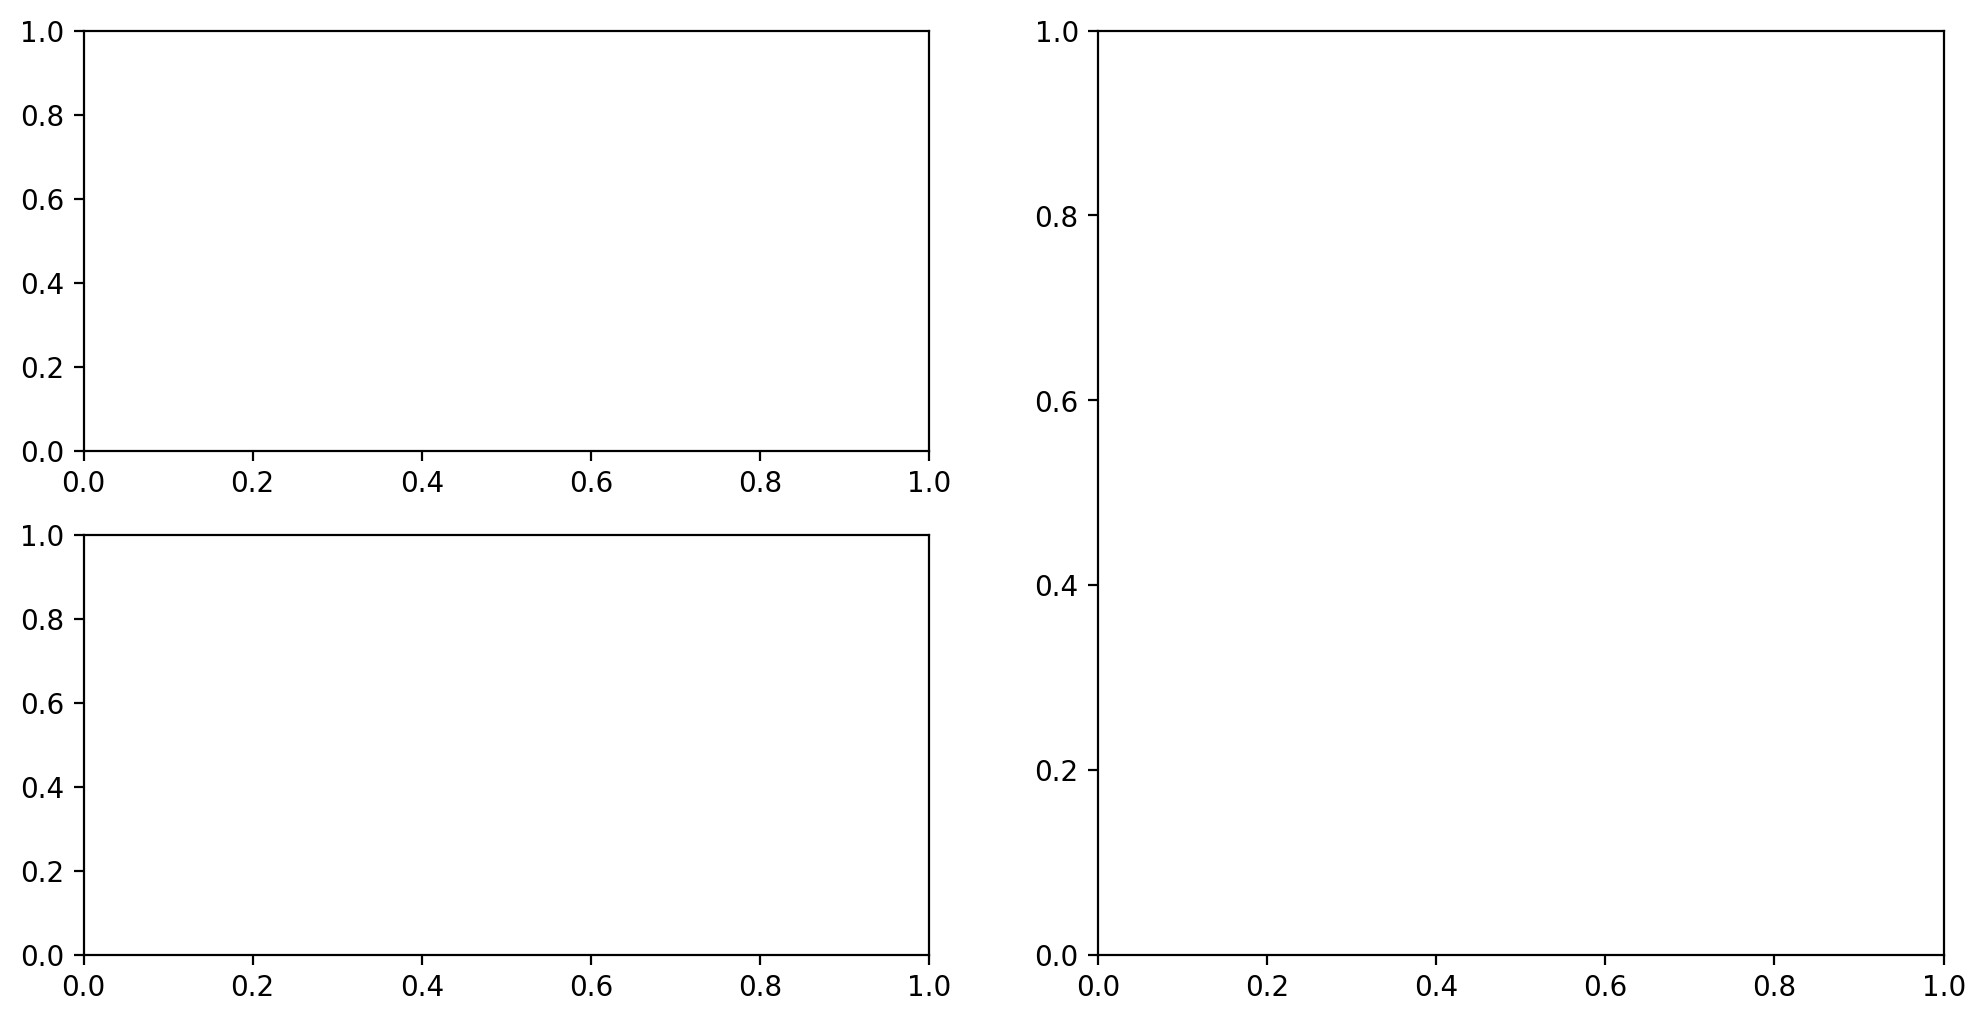

In [7]:
# COMPLETER LE CODE SUIVANT

# parameters
a, b, c, d = 0.1, 6*pow(10,-5), 0.05, 6*pow(10,-5)
T, N = 200, 1000
H0, P0 = 1500, 500


def F(X, t, d):
    """fonction second membre pour le système"""
    x, y = X[0], X[1]
    return 

t = np.linspace(0, T, N+1)
X = [H0,P0]

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 2) # subplot pour le champ de vecteurs et le graphe sardines vs requins
axr = fig.add_subplot(2, 2, 1) # subplot pour le graphe du nombre de requins en fonction du temps
axs = fig.add_subplot(2, 2, 3) # subplot pour le graphe du nombre de sardines en fonction du temps

list_p = [0, 0.02, 0.04, 0.06]
for k, pk in enumerate(list_p):
    couleur = (0, k/len(list_p), 1-k/len(list_p))
    

    # Tracer H en fonction du temps 
    # Tracer P en fonction du temps
    

> 2. Expliquez quel est l'impact de la pêche sur l'évolution des populations. Ce modèle permet-il d'expliquer les observations de d'Anconna sur la peche de la sardine dans la mer Adriatique (voir le cours)? Justifiez votre réponse.
> 3. Quelle espèce est favorisée par la pêche? 